<h1 style="background-color:#23ad48;">Flowers Dataset also Improvement of CNN with Data Augmentation</h1>

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers

import numpy as np
import PIL 
import cv2 
import os
import matplotlib.pyplot as plt

<h1 style="background-color:#23ad48;">Downloading dataset into local computer using this link <a href="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz">Click here</a></h1>

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

## Pathlib will create proper windows path

In [5]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

## Glob function will help us to search data

In [6]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [7]:
image_count1 = len(list(data_dir.glob('daisy/*')))
image_count2 = len(list(data_dir.glob('dandelion/*')))
image_count3 = len(list(data_dir.glob('roses/*')))
image_count4 = len(list(data_dir.glob('sunflowers/*')))
image_count5 = len(list(data_dir.glob('tulips/*')))
print("Daisy :",image_count1)
print("Dandelion :",image_count2)
print("Roses :",image_count3)
print("Sunflowers :",image_count4)
print("Tulips :",image_count5)

Daisy : 633
Dandelion : 898
Roses : 641
Sunflowers : 699
Tulips : 799


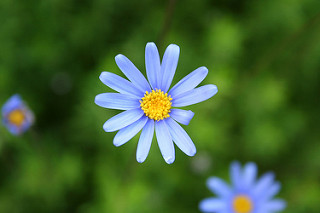

In [8]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[90]))

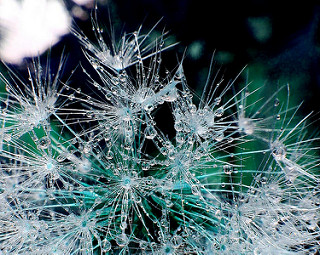

In [9]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[314]))

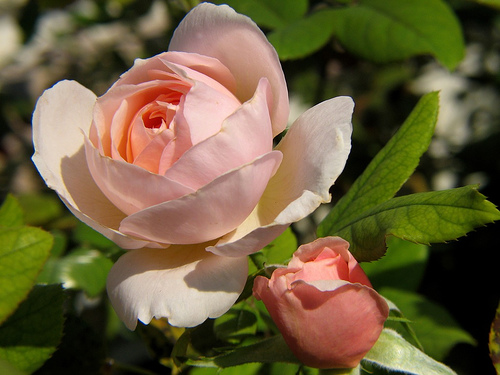

In [10]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[40]))

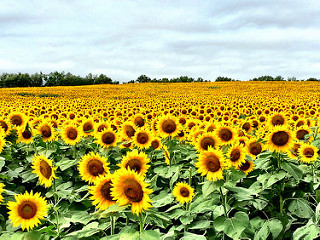

In [11]:
sunflowers = list(data_dir.glob('sunflowers/*'))
PIL.Image.open(str(sunflowers[80]))

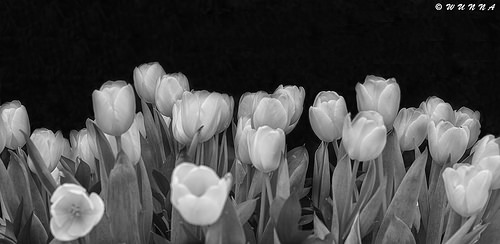

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[298]))

In [13]:
tulips[0]

WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg')

In [14]:
flowers_images={
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [15]:
flowers_labels={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [16]:
flowers_images['daisy'][:3]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg')]

In [17]:
str(flowers_images['daisy'][0])

'datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [18]:
img = cv2.imread(str(flowers_images['roses'][0]))
img.shape

(240, 179, 3)

In [19]:
img1 = cv2.resize(img,(120,120))

In [20]:
img1.shape

(120, 120, 3)

<h1 style="background-color:#23ad48;">Seperate images and their labels</h1>

In [21]:
x,y=[],[]
for name,img in flowers_images.items():
    for image in img:
        image_this = cv2.imread(str(image))
        resized_image = cv2.resize(image_this,(180,180))
        x.append(resized_image)
        y.append(flowers_labels[name])

In [22]:
x = np.array(x)
y = np.array(y)

In [23]:
y[:5]

array([0, 0, 0, 0, 0])

In [24]:
y.shape

(3670,)

In [25]:
x.shape

(3670, 180, 180, 3)

<h1 style="background-color:#23ad48;">Splitting training and testing data</h1>

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

## Scaling training data

In [27]:
# x_train.astype('int32')
# x_test.astype('int32')
x_train = x_train/255
x_test = x_test/255

In [28]:
x_train[0]

array([[[0.37647059, 0.39215686, 0.50588235],
        [0.37647059, 0.39215686, 0.50196078],
        [0.38431373, 0.40392157, 0.50196078],
        ...,
        [0.21568627, 0.23529412, 0.33333333],
        [0.22352941, 0.23137255, 0.3254902 ],
        [0.22745098, 0.23137255, 0.31372549]],

       [[0.38431373, 0.4       , 0.50980392],
        [0.38823529, 0.40784314, 0.50980392],
        [0.39215686, 0.41568627, 0.50980392],
        ...,
        [0.22745098, 0.24313725, 0.34117647],
        [0.23137255, 0.23921569, 0.3372549 ],
        [0.23529412, 0.23529412, 0.33333333]],

       [[0.39215686, 0.41176471, 0.50980392],
        [0.39215686, 0.41176471, 0.50980392],
        [0.39607843, 0.41960784, 0.50980392],
        ...,
        [0.25098039, 0.25882353, 0.35294118],
        [0.24705882, 0.25098039, 0.35294118],
        [0.25098039, 0.24705882, 0.35686275]],

       ...,

       [[0.4745098 , 0.45882353, 0.56470588],
        [0.33333333, 0.32156863, 0.42352941],
        [0.38431373, 0

In [29]:
print("Training data :",x_train.shape)
print("Testing data :",x_test.shape)

Training data : (2752, 180, 180, 3)
Testing data : (918, 180, 180, 3)


<h1 style="background-color:#23ad48;">CNN model before using Data Augmentation</h1>

In [43]:
model = models.Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
     
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(5)
])

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 133s 1s/step - loss: 1.4898 - accuracy: 0.3808
Epoch 2/10
86/86 [==============================] - 109s 1s/step - loss: 1.0758 - accuracy: 0.5759
Epoch 3/10
86/86 [==============================] - 109s 1s/step - loss: 0.8837 - accuracy: 0.6639
Epoch 4/10
86/86 [==============================] - 103s 1s/step - loss: 0.7060 - accuracy: 0.7362
Epoch 5/10
86/86 [==============================] - 93s 1s/step - loss: 0.4790 - accuracy: 0.8216
Epoch 6/10
86/86 [==============================] - 94s 1s/step - loss: 0.2951 - accuracy: 0.8924
Epoch 7/10
86/86 [==============================] - 94s 1s/step - loss: 0.1844 - accuracy: 0.9433
Epoch 8/10
86/86 [==============================] - 100s 1s/step - loss: 0.1127 - accuracy: 0.9706
Epoch 9/10
86/86 [==============================] - 108s 1s/step - loss: 0.0541 - accuracy: 0.9876
Epoch 10/10
86/86 [==============================] - 108s 1s/step - loss: 0.0255 - accuracy: 0.9949


<h1 style="background-color:#23ad48;">Accuracy : 65%</h1>

In [46]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 17s 372ms/step - loss: 1.8503 - accuracy: 0.6514


[1.8502521514892578, 0.6514161229133606]

In [47]:
predictions = model.predict(x_test)

29/29 [==============================] - 15s 409ms/step


In [48]:
predictions


array([[ -1.6928977 ,   6.752     ,   0.9331046 ,  -6.33825   ,
         -2.4952812 ],
       [  4.165121  ,   5.882377  ,  10.455515  , -17.550934  ,
          4.409092  ],
       [  4.4045196 ,   0.27468273,   9.694626  ,  -8.622678  ,
          7.9929247 ],
       ...,
       [ -2.6061838 ,  -3.4373417 ,   2.616566  ,  12.107333  ,
         11.248141  ],
       [ 11.824621  ,   3.1356087 ,  -2.1365569 ,  -5.785229  ,
         -1.0053124 ],
       [ -7.951125  ,   3.2293549 ,   4.3667274 ,  10.508132  ,
          9.491584  ]], dtype=float32)

In [49]:
img = tf.nn.softmax(predictions[190])

In [50]:
np.argmax(img)

4

In [51]:
y_test[190]

4

<h1 style="background-color:#23ad48;">CNN model after using Data Augmentation</h1>

In [39]:
data_augmentation = models.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)



In [40]:
num_classes = 5

model = models.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train, y_train, epochs=10)    

Epoch 1/10
86/86 [==============================] - 131s 1s/step - loss: 1.3767 - accuracy: 0.3990
Epoch 2/10
86/86 [==============================] - 153s 2s/step - loss: 1.0749 - accuracy: 0.5650
Epoch 3/10
86/86 [==============================] - 133s 2s/step - loss: 0.9703 - accuracy: 0.6268
Epoch 4/10
86/86 [==============================] - 136s 2s/step - loss: 0.9072 - accuracy: 0.6555
Epoch 5/10
86/86 [==============================] - 119s 1s/step - loss: 0.8427 - accuracy: 0.6708
Epoch 6/10
86/86 [==============================] - 133s 2s/step - loss: 0.7643 - accuracy: 0.7086
Epoch 7/10
86/86 [==============================] - 110s 1s/step - loss: 0.7543 - accuracy: 0.7188
Epoch 8/10
86/86 [==============================] - 114s 1s/step - loss: 0.7038 - accuracy: 0.7456
Epoch 9/10
86/86 [==============================] - 108s 1s/step - loss: 0.6809 - accuracy: 0.7358
Epoch 10/10
86/86 [==============================] - 109s 1s/step - loss: 0.6455 - accuracy: 0.7525


<h1 style="background-color:#23ad48;">Accuracy : 70%</h1>

In [42]:
model.evaluate(x_test,y_test)

29/29 [==============================] - 12s 360ms/step - loss: 0.7361 - accuracy: 0.7059


[0.7360644340515137, 0.7058823704719543]

<b style="background-color:pink;">Conclusion:<br>So here we see that Data Augmentation(means randomly zooming,flipping, and rotating image post a good impact on our CNN model performance and its accuracy from 65% to 70% which I know not a big difference but best.</b>